In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
pd.options.display.max_columns = 99

$$\frac{h_r}{h_c} = x (Total\ \Delta T)^y$$

$$\frac{h_r}{h_c} = z$$

$$ln(z) = ln(x) + y ln(Total\ \Delta T)$$

In [3]:
df_all = pd.read_csv('values.csv')

df_all.columns = df_all.loc[0]
df_all = df_all.drop(0)
df_all = df_all.rename(lambda x: x.replace('\n', ' '), axis=1)
df_all[['Fresh Air  Velocity m/s',
                 'hr W/m2 K',
                 'hc W/m2 K',
                 'Total  ΔT']] = df_all[['Fresh Air  Velocity m/s',
                 'hr W/m2 K',
                 'hc W/m2 K',
                 'Total  ΔT']].astype(float)
df_all.head()

,No,Folder No,Condition,Iterations,Mesh,Radiator Surface Temperature K,Walls Temperature K,Radiator Dimensions cm,Fresh Air Velocity m/s,Fresh Air Temperature K,Exhaust Air Temperature K,qt W/m2,qr W/m2,qc W/m2,qr/qt,hr W/m2 K,hc W/m2 K,ht W/m2 K,Nu,Area-weighted average Wall yplus,Max Wall yplus,AUST,Ta,Ts,Radiation ΔT,Convection ΔT,Total ΔT
1,1-1,6,Radiator,"5,000","138,246",313,293,110 x 55 x 10,2.0,285,293,419.56,120.63,298.93,0.28752,4.87,12.01,16.93,699.77,NaN,NaN,288.23,288.11,313.00,24.77,24.89,24.78
2,1-2,8,Radiator,"5,000","138,246",318,293,110 x 55 x 10,2.0,285,293,543.58,154.61,388.97,0.28443,5.20,12.77,18.27,754.91,5.30,18.57,288.27,287.54,318.00,29.73,30.46,29.75
3,1-3,9,Radiator,"5,000","138,246",323,293,110 x 55 x 10,2.0,285,293,654.18,190.22,463.96,0.29078,5.48,13.35,19.21,793.60,5.87,18.00,288.29,288.25,323.00,34.71,34.75,34.05
4,1-4,10,Radiator,"5,000","138,246",328,293,110 x 55 x 10,2.0,285,293,773.83,227.54,546.29,0.29404,5.73,13.71,19.48,805.10,5.62,18.74,288.29,288.15,328.00,39.71,39.85,39.72
5,1-5,11,Radiator,"5,000","138,246",333,293,110 x 55 x 10,2.0,285,293,885.45,266.60,618.85,0.30109,5.96,13.95,19.81,818.56,5.89,19.29,288.27,288.64,333.00,44.73,44.36,44.70


In [4]:
def regress(df):

    df['hrc'] = df['hr W/m2 K'] / df['hc W/m2 K']

    df['log(hrc)'] = np.log(df['hrc'])
    df['log(T)'] = np.log(df['Total  ΔT'])

    X = df[['log(T)']]
    y = df['log(hrc)']

    lm = LinearRegression()

    lm.fit(X, y)

    x = np.exp(lm.intercept_)
    y = lm.coef_[0]
    df['x'] = x
    df['y'] = y
    df['estimated hr/hc'] = df['x'] * df['Total  ΔT'] ** df['y']
    df['error'] = (df['estimated hr/hc'] - df['hrc']) ** 2
    return df

In [5]:
df_all.groupby('Fresh Air  Velocity m/s').apply(regress)

,No,Folder No,Condition,Iterations,Mesh,Radiator Surface Temperature K,Walls Temperature K,Radiator Dimensions cm,Fresh Air Velocity m/s,Fresh Air Temperature K,Exhaust Air Temperature K,qt W/m2,qr W/m2,qc W/m2,qr/qt,hr W/m2 K,hc W/m2 K,ht W/m2 K,Nu,Area-weighted average Wall yplus,Max Wall yplus,AUST,Ta,Ts,Radiation ΔT,Convection ΔT,Total ΔT,hrc,log(hrc),log(T),x,y,estimated hr/hc,error
1,1-1,6,Radiator,"5,000","138,246",313,293,110 x 55 x 10,2.0,285,293,419.56,120.63,298.93,0.28752,4.87,12.01,16.93,699.77,NaN,NaN,288.23,288.11,313.00,24.77,24.89,24.78,0.405495,-0.902646,3.210037,0.246199,0.148331,0.396346,8.370642e-05
2,1-2,8,Radiator,"5,000","138,246",318,293,110 x 55 x 10,2.0,285,293,543.58,154.61,388.97,0.28443,5.20,12.77,18.27,754.91,5.30,18.57,288.27,287.54,318.00,29.73,30.46,29.75,0.407204,-0.898440,3.392829,0.246199,0.148331,0.407240,1.252158e-09
3,1-3,9,Radiator,"5,000","138,246",323,293,110 x 55 x 10,2.0,285,293,654.18,190.22,463.96,0.29078,5.48,13.35,19.21,793.60,5.87,18.00,288.29,288.25,323.00,34.71,34.75,34.05,0.410487,-0.890411,3.527830,0.246199,0.148331,0.415477,2.490006e-05
4,1-4,10,Radiator,"5,000","138,246",328,293,110 x 55 x 10,2.0,285,293,773.83,227.54,546.29,0.29404,5.73,13.71,19.48,805.10,5.62,18.74,288.29,288.15,328.00,39.71,39.85,39.72,0.417943,-0.872410,3.681855,0.246199,0.148331,0.425078,5.091276e-05
5,1-5,11,Radiator,"5,000","138,246",333,293,110 x 55 x 10,2.0,285,293,885.45,266.60,618.85,0.30109,5.96,13.95,19.81,818.56,5.89,19.29,288.27,288.64,333.00,44.73,44.36,44.70,0.427240,-0.850409,3.799974,0.246199,0.148331,0.432592,2.863937e-05
6,1-6,12,Radiator,"5,000","138,246",338,293,110 x 55 x 10,2.0,285,293,1014.72,307.42,707.30,0.30296,6.19,14.15,20.43,844.03,6.00,21.57,288.34,288.01,338.00,49.66,49.99,49.67,0.437456,-0.826780,3.905401,0.246199,0.148331,0.439410,3.818210e-06
7,1-7,13,Radiator,"5,000","138,246",343,293,110 x 55 x 10,2.0,285,293,1139.22,350.11,789.11,0.30732,6.40,14.43,20.75,857.38,5.99,19.10,288.30,288.31,343.00,54.70,54.69,54.90,0.443520,-0.813011,4.005513,0.246199,0.148331,0.445984,6.067534e-06
8,1-8,14,Radiator,"5,000","138,246",348,293,110 x 55 x 10,2.0,285,293,1257.02,394.69,862.33,0.31399,6.61,14.45,21.01,868.07,6.23,19.17,288.29,288.32,348.00,59.71,59.68,59.83,0.457439,-0.782111,4.091507,0.246199,0.148331,0.451709,3.283920e-05
9,1-9,15,Radiator,"5,000","138,246",353,293,110 x 55 x 10,2.0,285,293,1380.13,441.25,938.88,0.31972,6.82,14.67,21.18,875.28,6.33,20.58,288.30,289.00,353.00,64.70,64.00,65.16,0.464894,-0.765945,4.176846,0.246199,0.148331,0.457463,5.522274e-05
10,2-1,16,Radiator,"5,000","138,246",313,293,110 x 55 x 10,1.5,285,293,406.45,120.66,285.79,0.29686,4.87,11.68,16.40,677.84,4.40,14.77,288.22,288.53,313.00,24.78,24.47,24.78,0.416952,-0.874784,3.210037,0.244114,0.157738,0.405038,1.419472e-04


<div style="color:red;background-color:blue"><h6>gergerg</h6></div>

In [6]:
df_all.groupby('Fresh Air  Velocity m/s').apply(regress) \
    .groupby('Fresh Air  Velocity m/s')[['x', 'y', 'error']].mean().rename({'error': 'mean squared error'}, axis=1)

,x,y,mean squared error
Fresh Air Velocity m/s,,,
1.5,0.244114,0.157738,0.000037
2.0,0.246199,0.148331,0.000032
2.5,0.249160,0.138310,0.000027


In [2]:
import numpy as np
from sklearn.datasets import make_blobs

In [13]:
x, y = make_blobs(900, 4, 5)
cov = x.T @ x
u, s, v = np.linalg.svd(cov)

In [14]:
np.linalg.svd(cov, )[0]

array([[-0.32809294, -0.60890585, -0.644141  , -0.32660535],
       [ 0.59624943,  0.0153149 ,  0.08643425, -0.79798571],
       [-0.00343763,  0.74139928, -0.66830195, -0.06072716],
       [ 0.73268672, -0.28164911, -0.36191711,  0.50285183]])

In [15]:
import matplotlib.pyplot as plt

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor()

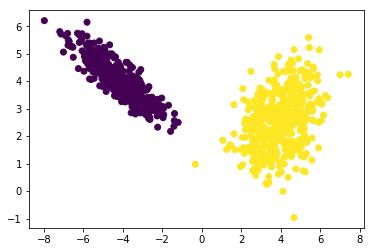

In [102]:
x, y = make_blobs(900, 2, 2)
x[y==0] = x[y==0] @ np.array([[0.9, -0.7], [-0.7, 0.1]])
x[y==1] = x[y==1] @ np.array([[1, 0.2], [0.2, 1]])

plt.scatter(*x.T, c=y)

In [104]:
X = [
    [23, 45, 12],
    [24, 42, 91],
    [12, 40, 25],
    [35, 49, 32],
    [19, 23, 25]
]
y = [921, 905, 145, 256, 301]

In [105]:
X = np.array(X)
z = np.array([[15, 31, 41]])

In [111]:
np.mean(y)

505.6

In [110]:
(301 + 145) / 2

223.0

In [109]:
((X - z)**2).sum(axis=1)

array([1101, 2702,  346,  805,  336], dtype=int32)

In [130]:
y = [17, 42, 23, 45, 52, 95, 26]
yhat = [18, 41, 24, 48, 55, 65, 25]
yhat = [29, 49, 29, 50, 56, 92, 35]

In [131]:
y = np.array(y)
yhat = np.array(yhat)

In [132]:
((y - yhat)**2).mean().round(3)

51.429

In [128]:
(np.abs(y - yhat)).mean().round(3)

6.571

In [129]:
((np.abs((y - yhat) / y)).mean() * 100).round(3)

24.274

In [133]:
def adjr2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [143]:
round(adjr2(0.85, 23, 5), 3)

0.806

In [144]:
round(adjr2(0.87, 23, 8), 3)

0.796

In [145]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression()

In [ ]:
Sehir | X1 | X2 | X3 | vaka sayisi
-----------------------------------
A        23   45    12   921
B        24   42    91   905
C        12    40    25  145
D        35   49    32  256
E        19    23     25  301
F        15    31     41   ?

In [147]:
c = np.array([12, 40, 25])
f = np.array([15, 31, 41])

np.abs(c-f).sum()

28

In [149]:
x = np.array(
[
    [23, 45, 12],
    [24, 42, 91],
    [12, 40, 25],
    [35, 49, 32],
    [19, 23, 25]
]
)
f = np.array([[15, 31, 41]])

In [152]:
(np.abs(x - f)).sum(axis=1)

array([51, 70, 28, 47, 28])

In [161]:
X1 = np.array([5, 7])
X2 = np.array([3, 1])
X3 = np.array([-1, -3])

In [171]:
def tanh(x1, x2, gamma, r):
    return np.tanh(gamma * (x1*x2).sum() + r).round(5)

In [172]:
tanh(X1, X2, 0.1, 1)

0.99668

In [173]:
tanh(X1, X3, 0.1, 1)

-0.92167

In [174]:
tanh(X1, X2, 0.003, 1)

0.78795

In [175]:
tanh(X1, X3, 0.003, 1)

0.72684

In [194]:
from sklearn.datasets import make_circles, make_swiss_roll

In [197]:
X, y = make_circles(n_samples=100)

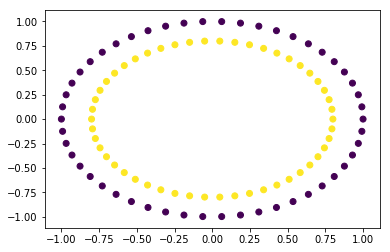

In [198]:
plt.scatter(*X.T, c=y)

In [199]:
from sklearn.metrics.pairwise import rbf_kernel

In [200]:
import seaborn as sns

In [201]:
import pandas as pd

In [202]:
df = pd.DataFrame(X).assign(y=y)
df = df.sort_values('y')

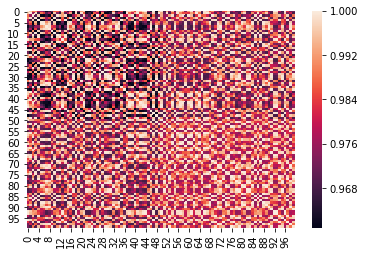

In [206]:
sns.heatmap(
    pd.DataFrame(rbf_kernel(df.drop('y', 1), gamma=0.01))
)

In [214]:
def gini(y):
    y = np.array(y)
    n = y.shape[0]
    return (1 - ((y==1).sum()/n)**2 - ((y==0).sum()/n)**2).round(5)

In [215]:
Y1 = [0, 1, 1, 0, 1, 1, 0, 0, 1]
Y2 = [1, 1, 1, 1, 1, 1, 1, 0, 1]

gini(Y1)

0.49383

In [216]:
gini(Y2)

0.19753

In [217]:
gercek = [0, 1, 0, 1, 1, 0, 0, 0]
tahmin = [0, 1, 0, 1, 1, 1, 1, 0]

In [218]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [219]:
precision_score(gercek, tahmin)

0.6

In [220]:
recall_score(gercek, tahmin)

1.0

In [222]:
f1_score(gercek, tahmin).round(5)

0.75

In [223]:
np.array([2, 3]) @ np.array([3, 4])

18

In [ ]:
X, y = make_cl

In [ ]:
trains = []
tests = []

for k in range(1, 100, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    